In [1]:
import tensorflow as tf


In [2]:
print tf.__file__

/home/elebouder/lucidtest/local/lib/python2.7/site-packages/tensorflow/__init__.pyc


In [3]:
pwd


u'/home/elebouder/TNSRVIS/lucid'

In [4]:
import numpy as np
import lucid.modelzoo.vision_models as models
from lucid.misc.io import show


In [5]:
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform


In [6]:
print 'a'

a


In [7]:
print 'a'

a


In [8]:
modela = models.InceptionV1()
modela.load_graphdef()
for node in modela.graph_def.node:
  if 'Concat' in node.op:
    print(node.name)


mixed3a
mixed3b
mixed4a
mixed4b
mixed4c
mixed4d
mixed4e
mixed5a
mixed5b


In [9]:
model = models.AlexnetV2()
model.load_graphdef()


In [10]:
for node in model.graph_def.node:
  print(node.name)

input
alexnet_v2/conv1/weights
alexnet_v2/conv1/weights/read
alexnet_v2/conv1/biases
alexnet_v2/conv1/biases/read
alexnet_v2/conv1/Conv2D
alexnet_v2/conv1/BiasAdd
alexnet_v2/conv1/Relu
alexnet_v2/pool1/MaxPool
alexnet_v2/conv2/weights
alexnet_v2/conv2/weights/read
alexnet_v2/conv2/biases
alexnet_v2/conv2/biases/read
alexnet_v2/conv2/Conv2D
alexnet_v2/conv2/BiasAdd
alexnet_v2/conv2/Relu
alexnet_v2/pool2/MaxPool
alexnet_v2/conv3/weights
alexnet_v2/conv3/weights/read
alexnet_v2/conv3/biases
alexnet_v2/conv3/biases/read
alexnet_v2/conv3/Conv2D
alexnet_v2/conv3/BiasAdd
alexnet_v2/conv3/Relu
alexnet_v2/conv4/weights
alexnet_v2/conv4/weights/read
alexnet_v2/conv4/biases
alexnet_v2/conv4/biases/read
alexnet_v2/conv4/Conv2D
alexnet_v2/conv4/BiasAdd
alexnet_v2/conv4/Relu
alexnet_v2/conv5/weights
alexnet_v2/conv5/weights/read
alexnet_v2/conv5/biases
alexnet_v2/conv5/biases/read
alexnet_v2/conv5/Conv2D
alexnet_v2/conv5/BiasAdd
alexnet_v2/conv5/Relu
alexnet_v2/pool5/MaxPool
alexnet_v2/fc6/weights
a

512 -0.01637087



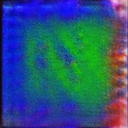

In [10]:
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0")

512 -0.007020606



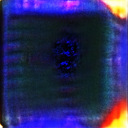

In [11]:
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:1")

512 -0.00028876163



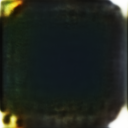

In [12]:
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:3")

512 -0.00020413076



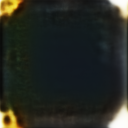

In [13]:
obj = objectives.channel("alexnet_v2/conv3/Conv2D", 2)
_ = render.render_vis(model, obj)

512 -0.00020737914



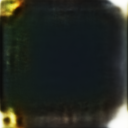

In [14]:
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:2")

512 1.4892142



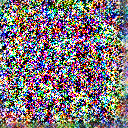

In [20]:
transforms = []
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0", transforms=transforms)

512 0.40737832



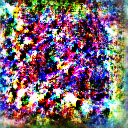

In [21]:
transforms = [transform.jitter(2)]
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0", transforms=transforms)

512 0.4505051



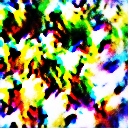

In [29]:
transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:5", transforms=transforms)

512 0.1243217



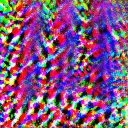

In [23]:
param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0", param_f)

512 0.18864697



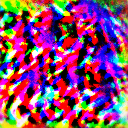

In [24]:
param_f = lambda: param.image(128, fft=True, decorrelate=False)
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0", param_f)

512 0.075364456



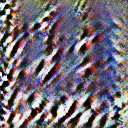

In [25]:
param_f = lambda: param.image(128, fft=False, decorrelate=True)
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0", param_f)

512 0.1425941



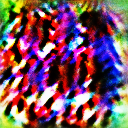

In [26]:
param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "alexnet_v2/conv3/Conv2D:0", param_f)

512 0.279786



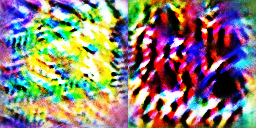

In [27]:
param_f = lambda: param.image(128, batch=2)
obj = objectives.channel("alexnet_v2/conv3/Conv2D", 0, batch=1) - objectives.channel("alexnet_v2/conv3/Conv2D", 0, batch=0)
_ = render.render_vis(model, obj, param_f)

512 0.14748217



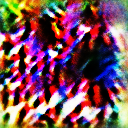

512 0.4837995



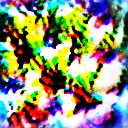

512 0.53154033



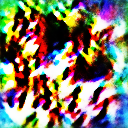

In [30]:
neuron1 = ("alexnet_v2/conv3/Conv2D", 0)
neuron2 = ("alexnet_v2/conv3/Conv2D", 5)
C = lambda neuron: objectives.channel(*neuron)

_ = render.render_vis(model, C(neuron1))
_ = render.render_vis(model, C(neuron2))
_ = render.render_vis(model, C(neuron1) + C(neuron2))

In [8]:
from lucid.misc.io import show, load
from lucid.misc.io.showing import _image_url
import lucid.scratch.web.svelte as lucid_svelte

In [9]:
model = models.InceptionResnet2()
model.load_graphdef()


In [10]:
for node in model.graph_def.node:
  if 'Concat' in node.op:
    print(node.name)

InceptionResnetV2/Mixed_5b/concat
InceptionResnetV2/Repeat/block35_1/concat
InceptionResnetV2/Repeat/block35_2/concat
InceptionResnetV2/Repeat/block35_3/concat
InceptionResnetV2/Repeat/block35_4/concat
InceptionResnetV2/Repeat/block35_5/concat
InceptionResnetV2/Repeat/block35_6/concat
InceptionResnetV2/Repeat/block35_7/concat
InceptionResnetV2/Repeat/block35_8/concat
InceptionResnetV2/Repeat/block35_9/concat
InceptionResnetV2/Repeat/block35_10/concat
InceptionResnetV2/Mixed_6a/concat
InceptionResnetV2/Repeat_1/block17_1/concat
InceptionResnetV2/Repeat_1/block17_2/concat
InceptionResnetV2/Repeat_1/block17_3/concat
InceptionResnetV2/Repeat_1/block17_4/concat
InceptionResnetV2/Repeat_1/block17_5/concat
InceptionResnetV2/Repeat_1/block17_6/concat
InceptionResnetV2/Repeat_1/block17_7/concat
InceptionResnetV2/Repeat_1/block17_8/concat
InceptionResnetV2/Repeat_1/block17_9/concat
InceptionResnetV2/Repeat_1/block17_10/concat
InceptionResnetV2/Repeat_1/block17_11/concat
InceptionResnetV2/Repeat_

512 10.00003



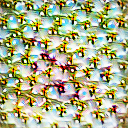

In [11]:
import lucid.optvis.render as render
_ = render.render_vis(model, "InceptionResnetV2/Mixed_5b/concat:0")

512 11.850962



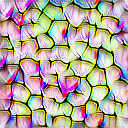

512 14.013417



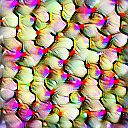

512 23.67553



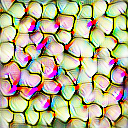

In [12]:
neuron1 = ("InceptionResnetV2/Mixed_5b/concat", 65)
neuron2 = ("InceptionResnetV2/Mixed_5b/concat", 5)
C = lambda neuron: objectives.channel(*neuron)

_ = render.render_vis(model, C(neuron1))
_ = render.render_vis(model, C(neuron2))
_ = render.render_vis(model, C(neuron1) + C(neuron2))

512 20.475391



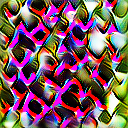

512 11.040406



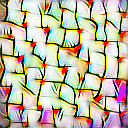

512 25.608593



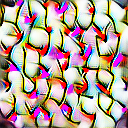

In [26]:
neuron1 = ("InceptionResnetV2/Mixed_5b/concat", 20)
neuron2 = ("InceptionResnetV2/Mixed_5b/concat", -1)
C = lambda neuron: objectives.channel(*neuron)

_ = render.render_vis(model, C(neuron1))
_ = render.render_vis(model, C(neuron2))
_ = render.render_vis(model, C(neuron1) + C(neuron2))

InceptionResnetV2
import/InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0b_5x5/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Mixed_5b/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Mixed_5b/Branch_3/Conv2d_0b_1x1/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_1/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_1/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_2/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_2/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_3/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_3/Branch_2/Conv2d_0c_3x3/BatchNorm/Fused


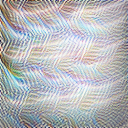

In [12]:
obj = objectives.channel("InceptionResnetV2/Mixed_6a/concat", 2)
_ = render.render_vis(model, obj)

In [27]:
for node in model.graph_def.node:
    print(node.name)

input
InceptionResnetV2/Conv2d_1a_3x3/weights
InceptionResnetV2/Conv2d_1a_3x3/weights/read
InceptionResnetV2/Conv2d_1a_3x3/Conv2D
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/Const
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/beta
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/beta/read
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/moving_mean
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/moving_mean/read
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/moving_variance
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/moving_variance/read
InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/FusedBatchNorm
InceptionResnetV2/Conv2d_1a_3x3/Relu
InceptionResnetV2/Conv2d_2a_3x3/weights
InceptionResnetV2/Conv2d_2a_3x3/weights/read
InceptionResnetV2/Conv2d_2a_3x3/Conv2D
InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/Const
InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/beta
InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/beta/read
InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/moving_mean
InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/moving_mean/read
InceptionRe

InceptionResnetV2
import/InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0b_5x5/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Mixed_5b/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Mixed_5b/Branch_3/Conv2d_0b_1x1/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_1/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_1/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_2/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_2/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_3/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_3/Branch_2/Conv2d_0c_3x3/BatchNorm/Fused


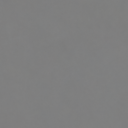

In [18]:
obj = objectives.channel("InceptionResnetV2/Mixed_7a/concat", 1)
_ = render.render_vis(model, obj)

InceptionResnetV2
import/InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0b_5x5/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Mixed_5b/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Mixed_5b/Branch_3/Conv2d_0b_1x1/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_1/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_1/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_2/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_2/Branch_2/Conv2d_0c_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
InceptionResnetV2
import/InceptionResnetV2/Repeat/block35_3/Branch_1/Conv2d_0b_3x3/BatchNorm/FusedBatchNorm
<dtype: 'float32'>
import/InceptionResnetV2/Repeat/block35_3/Branch_2/Conv2d_0c_3x3/BatchNorm/Fused


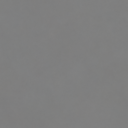

In [19]:
obj = objectives.channel("InceptionResnetV2/Mixed_7a/concat", 10)
_ = render.render_vis(model, obj)

In [28]:
_ = render.render_vis(model, "InceptionResnetV2/Conv2d_7b_1x1/BatchNorm/FusedBatchNorm")

ValueError: need more than 1 value to unpack